# Eda using sweet wiz (Exploratory Data Analysis)
Helps identify patterns and anomalies, Helps test hypotheses and check assumptions, Helps determine how to manipulate data sources, Helps determine if statistical techniques are appropriate, and Helps understand relationships between variables. 


In [23]:
# pip install pandas sweetviz

In [1]:
import pandas as pd
import sweetviz as sv

def perform_car_price_eda(file_path):
    """
    Perform EDA on car price dataset using Sweetviz
    
    Parameters:
    file_path (str): Path to the CSV file containing car price data
    """
    # Read the CSV file
    try:
        df = pd.read_csv(file_path)
        
        # Select the features mentioned
        features = ['year_of_reference', 'month_of_reference','brand','model','fuel','gear','engine_size','year_model', 'avg_price_brl', 'age_years']
        df_selected = df[features]
        
        # Create Sweetviz report
        report = sv.analyze(df_selected)
        
        # Save the report
        report.show_html('car_price_analysis_report.html')
        
        print("EDA report has been generated successfully as 'car_price_analysis_report.html'")
        
        # Additional summary statistics
        print("\nQuick Summary Statistics:")
        print("\nNumerical Features:")
        print(df_selected[['avg_price_brl', 'age_years']].describe())
        
        print("\nMissing Values:")
        print(df_selected.isnull().sum())
        
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Example usage
if __name__ == "__main__":
    file_path = 'Brazil fipe_2022.csv'
    perform_car_price_eda(file_path)

                                             |                                             | [  0%]   00:00 ->…

Report car_price_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
EDA report has been generated successfully as 'car_price_analysis_report.html'

Quick Summary Statistics:

Numerical Features:
       avg_price_brl      age_years
count   2.902750e+05  290275.000000
mean    1.220872e+05      14.103367
std     3.219139e+05       9.263619
min     1.831000e+03       0.000000
25%     2.187500e+04       7.000000
50%     4.683600e+04      13.000000
75%     1.061650e+05      22.000000
max     8.600000e+06      38.000000

Missing Values:
year_of_reference     0
month_of_reference    0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
age_years             0
dtype: int64


#   Perform PCA analysis ( principal component analysis)
Is a process of figuring out mos important features or principal components that has the most impact on the target variable

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def perform_pca_analysis(file_path):
    """
    Perform PCA analysis on car price dataset
    
    Parameters:
    file_path (str): Path to the CSV file containing car price data
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Create label encoders
    le_month_of_reference = LabelEncoder()
    le_brand = LabelEncoder()
    le_model = LabelEncoder()
    le_fuel = LabelEncoder()
    le_gear = LabelEncoder()
    
    # Create copy of dataframe for processing
    inputs = df.copy()
    
    # Encode categorical variables
    inputs['month_of_reference_n'] = le_month_of_reference.fit_transform(inputs['month_of_reference'])
    inputs['brand_n'] = le_brand.fit_transform(inputs['brand'])
    inputs['model_n'] = le_model.fit_transform(inputs['model'])
    inputs['fuel_n'] = le_fuel.fit_transform(inputs['fuel'])
    inputs['gear_n'] = le_gear.fit_transform(inputs['gear'])
    
    # Select numerical columns for PCA
    X = inputs[['month_of_reference_n', 'brand_n', 'model_n', 'fuel_n', 'gear_n']]
    
    # Handle missing values if any
    X = X.fillna(X.mean())
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Create and fit PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Calculate explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot explained variance ratio
    ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    ax1.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'r-')
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.set_title('Explained Variance by Principal Components')
    
    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(
        X_pca,
        columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
    )
    
    # Plot first two principal components
    ax2.scatter(pca_df['PC1'], pca_df['PC2'])
    ax2.set_xlabel('First Principal Component')
    ax2.set_ylabel('Second Principal Component')
    ax2.set_title('First Two Principal Components')
    
    plt.tight_layout()
    plt.savefig('pca_analysis.png')
    plt.close()
    
    # Create component matrix with correct feature names
    feature_names = ['month_of_reference_n', 'brand_n', 'model_n', 'fuel_n', 'gear_n']
    component_matrix = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
        index=feature_names
    )
    
    # Print results
    print("\nPCA Analysis Results:")
    print("\nExplained Variance Ratio:")
    for i, ratio in enumerate(explained_variance_ratio):
        print(f"PC{i+1}: {ratio:.4f}")
    
    print("\nCumulative Explained Variance Ratio:")
    for i, ratio in enumerate(cumulative_variance_ratio):
        print(f"PC1 to PC{i+1}: {ratio:.4f}")
    
    print("\nComponent Matrix:")
    print(component_matrix)
    
    return pca, X_pca, component_matrix

# Example usage
if __name__ == "__main__":
    file_path = 'Brazil fipe_2022.csv'
    pca, X_pca, component_matrix = perform_pca_analysis(file_path)


PCA Analysis Results:

Explained Variance Ratio:
PC1: 0.2311
PC2: 0.2188
PC3: 0.2000
PC4: 0.1827
PC5: 0.1674

Cumulative Explained Variance Ratio:
PC1 to PC1: 0.2311
PC1 to PC2: 0.4499
PC1 to PC3: 0.6499
PC1 to PC4: 0.8326
PC1 to PC5: 1.0000

Component Matrix:
                           PC1       PC2       PC3       PC4       PC5
month_of_reference_n  0.000441 -0.002780  0.999976  0.004655  0.004380
brand_n              -0.196545  0.737877  0.001572 -0.373772  0.526497
model_n              -0.528421  0.333608 -0.001921  0.771899 -0.116815
fuel_n                0.667786  0.056113 -0.004876  0.513925  0.535510
gear_n               -0.486008 -0.584026 -0.004340  0.018044  0.649897


In [13]:
# pip install pandas numpy scikit-learn matplotlib seaborn plotly

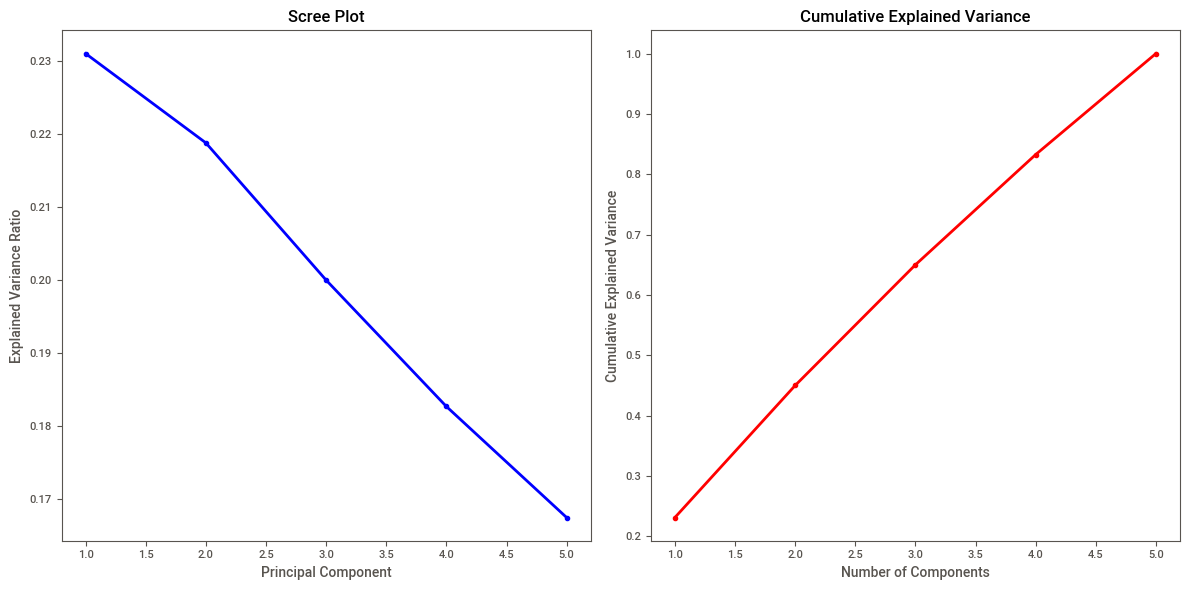

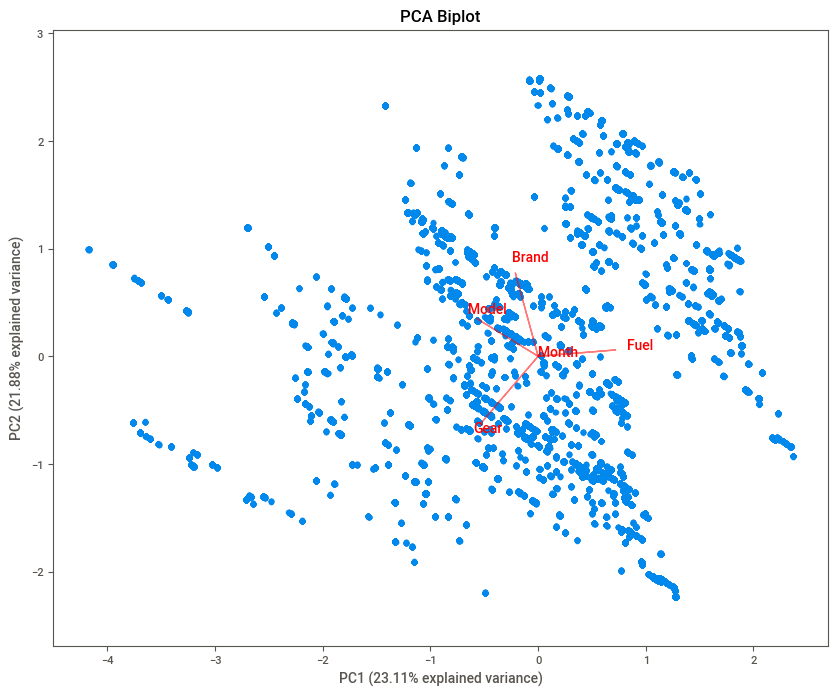

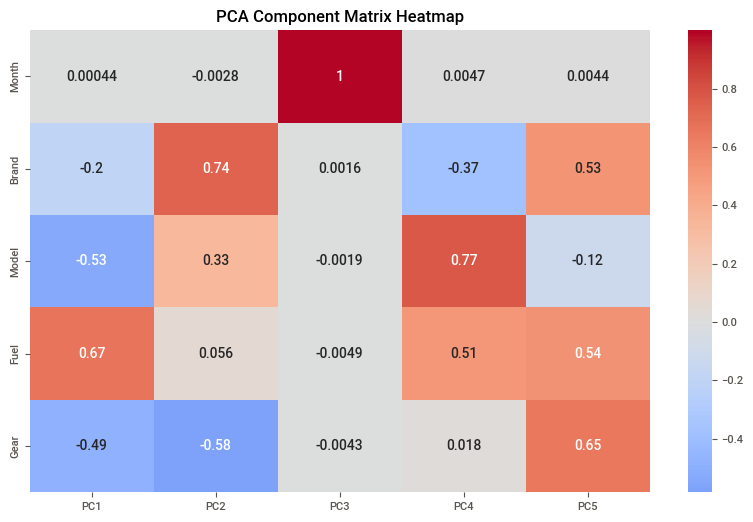


Explained Variance Ratios:
PC1: 0.2311 (23.11%)
PC2: 0.2188 (21.88%)
PC3: 0.2000 (20.00%)
PC4: 0.1827 (18.27%)
PC5: 0.1674 (16.74%)

Cumulative Explained Variance:
PC1 to PC1: 0.2311 (23.11%)
PC1 to PC2: 0.4499 (44.99%)
PC1 to PC3: 0.6499 (64.99%)
PC1 to PC4: 0.8326 (83.26%)
PC1 to PC5: 1.0000 (100.00%)


In [22]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Read the data
df = pd.read_csv('Brazil fipe_2022.csv')

# Create label encoders and encode categorical variables
le_month = LabelEncoder()
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_gear = LabelEncoder()

# Create copy of dataframe for processing
inputs = df.copy()

# Encode categorical variables
inputs['month_of_reference_n'] = le_month.fit_transform(inputs['month_of_reference'])
inputs['brand_n'] = le_brand.fit_transform(inputs['brand'])
inputs['model_n'] = le_model.fit_transform(inputs['model'])
inputs['fuel_n'] = le_fuel.fit_transform(inputs['fuel'])
inputs['gear_n'] = le_gear.fit_transform(inputs['gear'])

# Select features for PCA
X = inputs[['month_of_reference_n', 'brand_n', 'model_n', 'fuel_n', 'gear_n']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create DataFrames for visualization
pca_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

# 1. Scree Plot with Cumulative Variance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

# 2. Biplot of PC1 vs PC2
# Scale the features for the biplot
scaling = np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots(figsize=(10, 8))
# Plot the samples
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Plot the feature vectors
feature_names = ['Month', 'Brand', 'Model', 'Fuel', 'Gear']
for i, feature in enumerate(feature_names):
    ax.arrow(0, 0, 
            pca.components_[0, i] * scaling[0], 
            pca.components_[1, i] * scaling[1],
            color='r', alpha=0.5)
    ax.text(pca.components_[0, i] * scaling[0] * 1.15,
            pca.components_[1, i] * scaling[1] * 1.15,
            feature, color='r')

plt.title('PCA Biplot')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} explained variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} explained variance)')
plt.axis('equal')
plt.show()

# 3. Heatmap of Component Matrix
component_matrix = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=feature_names
)

plt.figure(figsize=(10, 6))
sns.heatmap(component_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Matrix Heatmap')
plt.show()

# Print the explained variance ratios
print("\nExplained Variance Ratios:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f} ({ratio:.2%})")

print("\nCumulative Explained Variance:")
cumulative = np.cumsum(pca.explained_variance_ratio_)
for i, cum_ratio in enumerate(cumulative):
    print(f"PC1 to PC{i+1}: {cum_ratio:.4f} ({cum_ratio:.2%})")

#  correlation heatmap

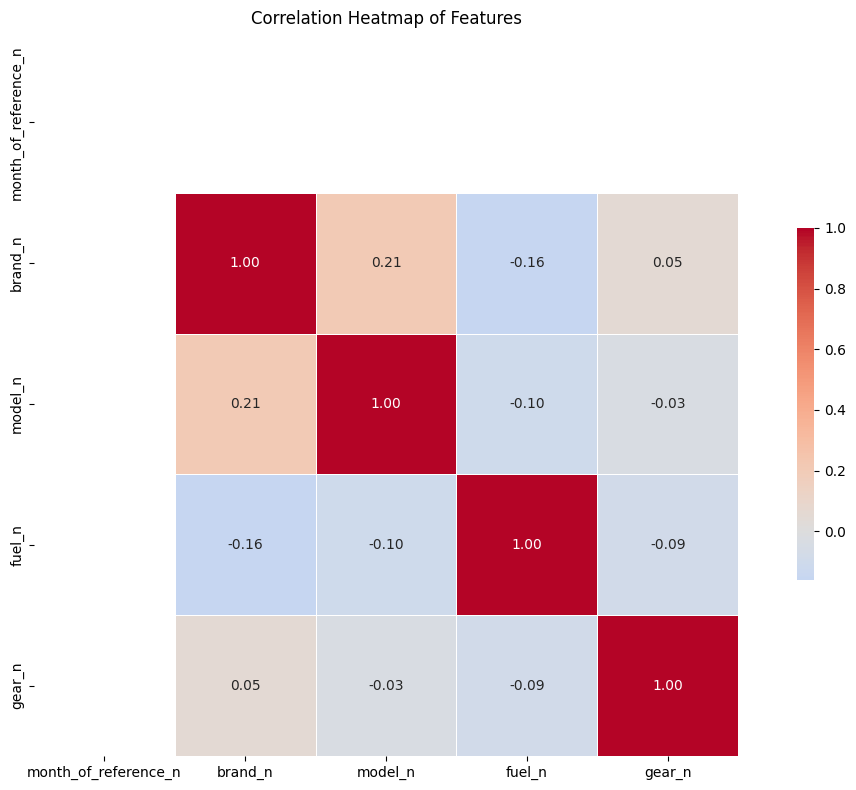


Correlation Matrix:
                      month_of_reference_n  brand_n  model_n  fuel_n  gear_n
month_of_reference_n                   NaN      NaN      NaN     NaN     NaN
brand_n                                NaN     1.00     0.21   -0.16    0.05
model_n                                NaN     0.21     1.00   -0.10   -0.03
fuel_n                                 NaN    -0.16    -0.10    1.00   -0.09
gear_n                                 NaN     0.05    -0.03   -0.09    1.00

Highly Correlated Feature Pairs (|correlation| > 0.5):
No feature pairs with correlation > 0.5 found


ValueError: The condensed distance matrix must contain only finite values.

<Figure size 1000x1000 with 0 Axes>

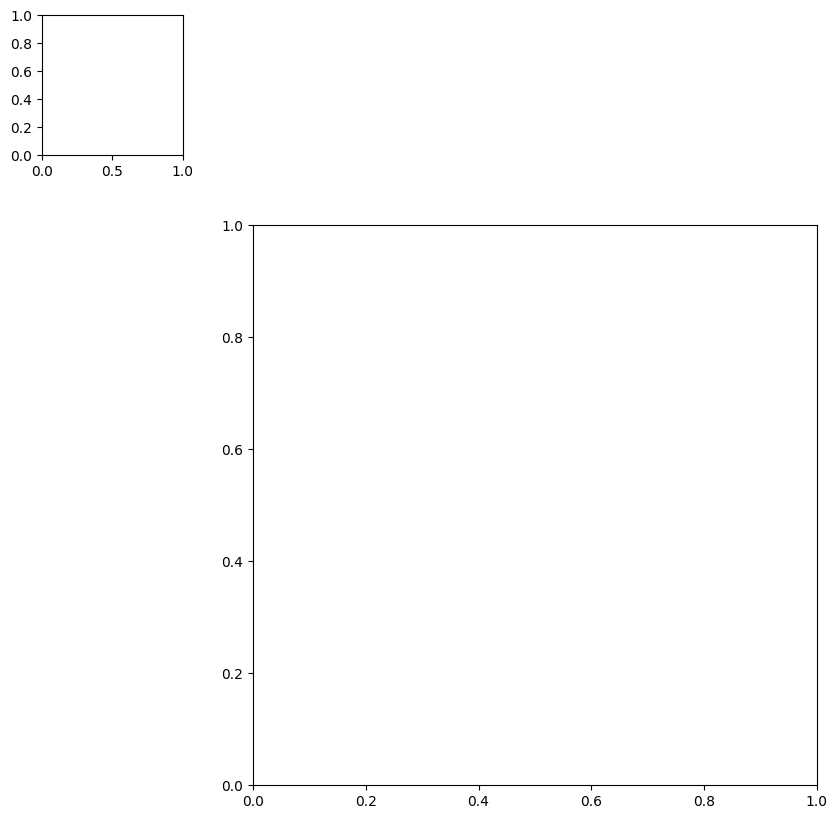

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('small Brazil fipe_2022.csv')

# Create label encoders and encode categorical variables
le_month = LabelEncoder()
le_brand = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_gear = LabelEncoder()

# Create copy of dataframe for processing
inputs = df.copy()

# Encode categorical variables
inputs['month_of_reference_n'] = le_month.fit_transform(inputs['month_of_reference'])
inputs['brand_n'] = le_brand.fit_transform(inputs['brand'])
inputs['model_n'] = le_model.fit_transform(inputs['model'])
inputs['fuel_n'] = le_fuel.fit_transform(inputs['fuel'])
inputs['gear_n'] = le_gear.fit_transform(inputs['gear'])

# Select numerical columns for correlation
numerical_cols = ['month_of_reference_n', 'brand_n', 'model_n', 'fuel_n', 'gear_n']

# Calculate correlation matrix
correlation_matrix = inputs[numerical_cols].corr()

# Create correlation heatmap with different styles
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            square=True,  # Make the plot square-shaped
            fmt='.2f',  # Format annotation with 2 decimal places
            linewidths=0.5,  # Add grid lines
            cbar_kws={"shrink": .5})  # Adjust colorbar size

plt.title('Correlation Heatmap of Features', pad=20)
plt.tight_layout()
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix.round(2))

# Additional correlation analysis
# Find highly correlated pairs (absolute correlation > 0.5)
print("\nHighly Correlated Feature Pairs (|correlation| > 0.5):")
high_corr = []
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        corr = abs(correlation_matrix.iloc[i,j])
        if corr > 0.5:
            high_corr.append({
                'Feature 1': numerical_cols[i],
                'Feature 2': numerical_cols[j],
                'Correlation': correlation_matrix.iloc[i,j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr)
    print(high_corr_df.sort_values('Correlation', key=abs, ascending=False))
else:
    print("No feature pairs with correlation > 0.5 found")

# Create a clustermap to show hierarchical relationships
plt.figure(figsize=(10, 10))
sns.clustermap(correlation_matrix,
               annot=True,
               cmap='coolwarm',
               center=0,
               fmt='.2f',
               linewidths=0.5,
               figsize=(10, 10))
plt.title('Hierarchical Clustering of Feature Correlations')
plt.show()

# Basic statistics for each feature
print("\nBasic Statistics for Encoded Features:")
print(inputs[numerical_cols].describe())

R² Score: 0.9626
Mean Squared Error (MSE): 2.2000
Root Mean Squared Error (RMSE): 1.4832
Mean Absolute Error (MAE): 1.4000


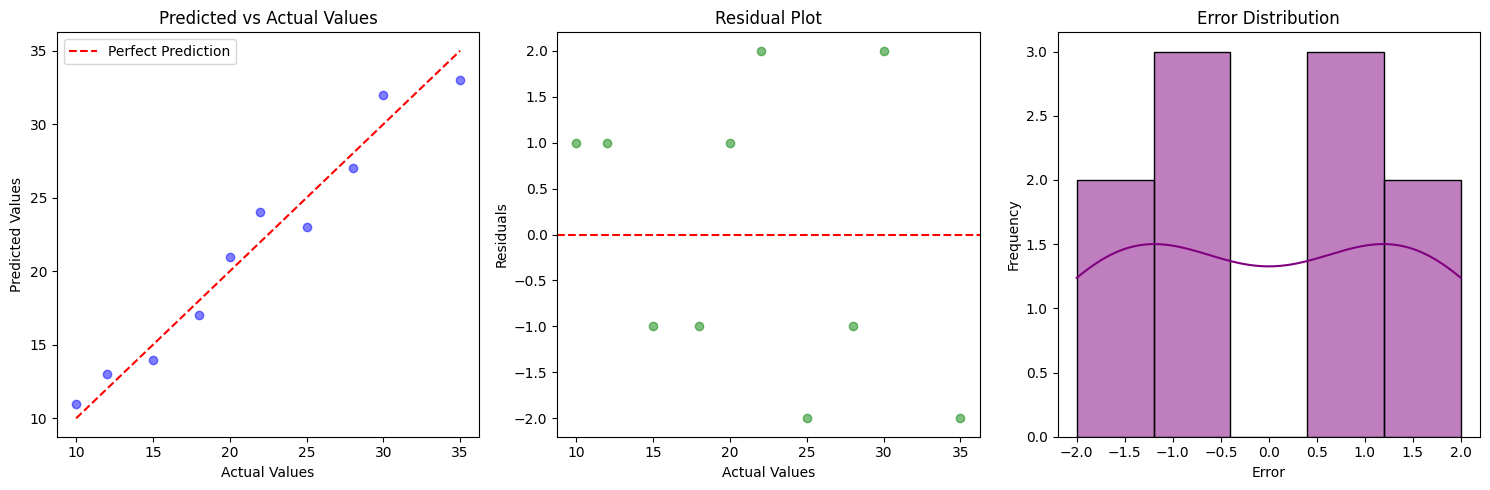

In [3]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample data for demonstration
np.random.seed(42)
true_values = np.array([10, 15, 12, 18, 20, 22, 25, 28, 30, 35])
predicted_values = np.array([11, 14, 13, 17, 21, 24, 23, 27, 32, 33])

def calculate_regression_metrics(y_true, y_pred):
    """
    Calculate R², MSE, MAE, and RMSE
    """
    # R-squared (R²) Score
    r2 = r2_score(y_true, y_pred)
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    
    return r2, mse, rmse, mae

# Calculate metrics
r2, mse, rmse, mae = calculate_regression_metrics(true_values, predicted_values)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(15, 5))

# Plot 1: Predicted vs Actual Values
plt.subplot(1, 3, 1)
plt.scatter(true_values, predicted_values, color='blue', alpha=0.5)
plt.plot([min(true_values), max(true_values)], 
         [min(true_values), max(true_values)], 
         'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()

# Plot 2: Residuals
residuals = predicted_values - true_values
plt.subplot(1, 3, 2)
plt.scatter(true_values, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Plot 3: Error Distribution
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution')

plt.tight_layout()
plt.show()